In [95]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as snb

data = pd.read_csv("heart.csv")

In [96]:
####Missing values
data.replace('?',np.nan,inplace=True)
data.isnull().any()

age        False
sex        False
cp         False
restbp     False
chol       False
fbs        False
restecg    False
thalach    False
exang      False
oldpeak    False
slope      False
ca          True
thal        True
hd         False
dtype: bool

In [97]:
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
data = data.dropna()
data['ca'] = data['ca'].fillna(data['ca'].mean())
data['thal'] = data['thal'].fillna(data['thal'].mean())
X = data.iloc[:,0:13]
Y = data.iloc[:,13]
data = pd.get_dummies(X,columns=['ca','thal','restecg','slope'])

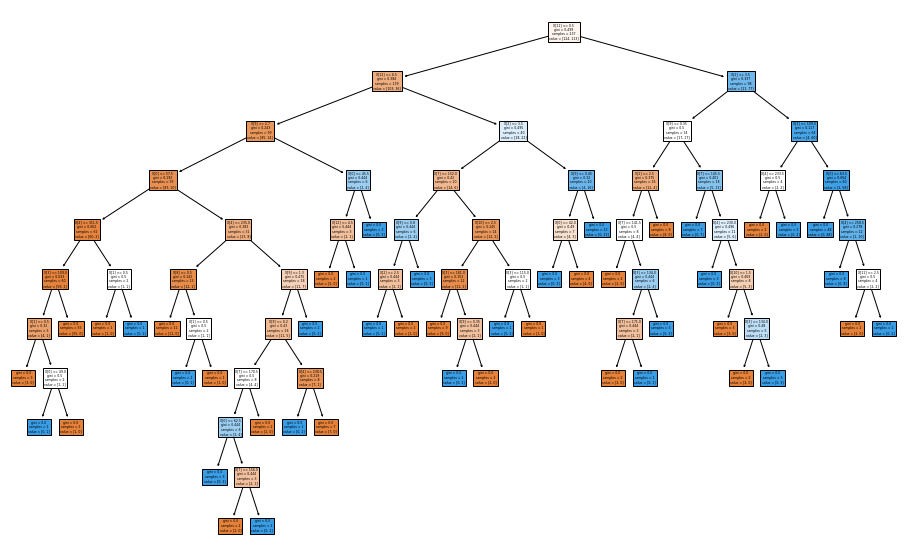

In [98]:
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
dtc = DecisionTreeClassifier(criterion='gini',random_state=42)
dtc.fit(X_train,Y_train)

plt.figure(figsize=(16,10))
plot_tree(dtc,filled=True)
plt.show()

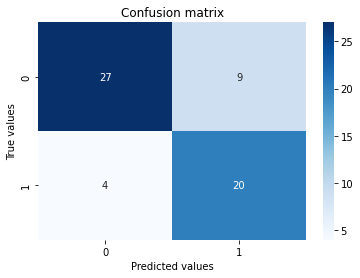

In [99]:
y_pred = dtc.predict(X_test)

conf_matrix = confusion_matrix(Y_test,y_pred)
snb.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix')
plt.show()

The cv_scores for 10 folds is :  [0.83333333 0.54166667 0.625      0.70833333 0.70833333 0.625
 0.58333333 0.73913043 0.82608696 0.73913043]


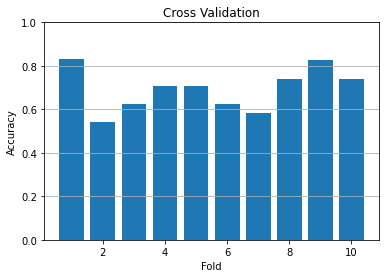

In [100]:
####Cross validation
cv_scores = cross_val_score(dtc,X_train,Y_train,cv=10)
print("The cv_scores for 10 folds is : ",cv_scores)

plt.bar(np.arange(1,len(cv_scores)+1),cv_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross Validation')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [101]:
##accuracy score
print("The accuracy is : ",accuracy_score(Y_test,y_pred))

report = classification_report(Y_test,y_pred)
print(report)

The accuracy is :  0.7833333333333333
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



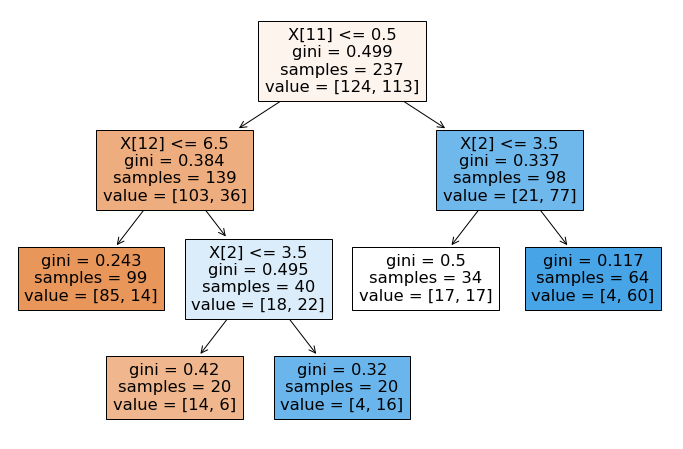

In [102]:
dtc2 = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.02,random_state=42)
dtc2.fit(X_train,Y_train)

plt.figure(figsize=(12,8))
plot_tree(dtc2,filled=True)
plt.show()

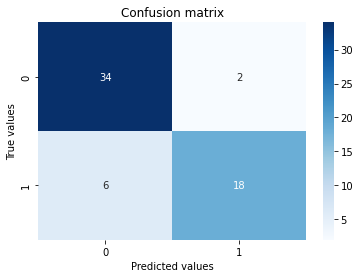

In [103]:
y_pred2 = dtc2.predict(X_test)

conf_matrix = confusion_matrix(Y_test,y_pred2)
snb.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix')
plt.show()

In [104]:
##accuracy score
print("The accuracy is : ",accuracy_score(Y_test,y_pred2))

report = classification_report(Y_test,y_pred2)
print(report)

The accuracy is :  0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60

